In [1]:
import pandas as pd

import numpy as np

In [50]:
file_path = r'C:\Users\syuan\Downloads\2024-2025_NBA.csv'
#df_prep = pd.read_csv(file_path)

df_prep = pd.read_csv("data/2024-2025_NBA as of Apr.csv")
df_prep

,PLAYER_NAME,TEAM_ABBREVIATION,POSITION,AGE,HEIGHT,WEIGHT,EXP,FGM,STL,PFD,AST
0,A.J. Lawson,TOR,G,24.0,"6'6""",179.0,2,80,13,38,31
1,AJ Green,MIL,G,25.0,"6'4""",190.0,2,182,37,50,108
2,AJ Johnson,WAS,G,20.0,"6'5""",160.0,R,82,12,27,76
3,Aaron Gordon,DEN,F,29.0,"6'8""",235.0,10,264,23,137,164
4,Aaron Holiday,HOU,G,28.0,"6'0""",185.0,6,117,19,49,83
...,...,...,...,...,...,...,...,...,...,...,...
525,Zach LaVine,SAC,G,30.0,"6'5""",200.0,10,625,58,228,310
526,Zeke Nnaji,DEN,F-C,24.0,"6'9""",240.0,4,70,25,38,23
527,Ziaire Williams,BKN,F,23.0,"6'9""",185.0,3,214,62,116,84
528,Zion Williamson,NOP,F,24.0,"6'6""",284.0,4,288,37,170,159


In [51]:
df_Features=df_prep[['PLAYER_NAME','POSITION','TEAM_ABBREVIATION','EXP','FGM','STL','PFD','AST']]
df_Features=df_Features.dropna(subset=['EXP'])
df_Features['EXP'] = df_Features['EXP'].replace('R', 0.5)
df_Features['EXP'] = pd.to_numeric(df_Features['EXP'], errors='coerce')
df_Features = df_Features.rename(columns={'TEAM_ABBREVIATION': 'TEAM'})
df_Features

,PLAYER_NAME,POSITION,TEAM,EXP,FGM,STL,PFD,AST
0,A.J. Lawson,G,TOR,2.0,80,13,38,31
1,AJ Green,G,MIL,2.0,182,37,50,108
2,AJ Johnson,G,WAS,0.5,82,12,27,76
3,Aaron Gordon,F,DEN,10.0,264,23,137,164
4,Aaron Holiday,G,HOU,6.0,117,19,49,83
...,...,...,...,...,...,...,...,...
525,Zach LaVine,G,SAC,10.0,625,58,228,310
526,Zeke Nnaji,F-C,DEN,4.0,70,25,38,23
527,Ziaire Williams,F,BKN,3.0,214,62,116,84
528,Zion Williamson,F,NOP,4.0,288,37,170,159


In [52]:
from sklearn.preprocessing import StandardScaler
cols_to_scale = ['EXP', 'FGM', 'STL', 'PFD', 'AST']

In [53]:
scaler = StandardScaler()
df_scaled_values = scaler.fit_transform(df_Features[cols_to_scale])

In [54]:
df_scaled_values

array([[-0.60649865, -0.65358581, -0.81788845, -0.53754983, -0.6978119 ],
       [-0.60649865, -0.05724074, -0.02214567, -0.40163439, -0.10857739],
       [-0.97149973, -0.64189277, -0.8510444 , -0.66213898, -0.35345407],
       ...,
       [-0.3631646 ,  0.12984791,  0.80675305,  0.34590052, -0.2922349 ],
       [-0.11983054,  0.56249041, -0.02214567,  0.95751999,  0.28169481],
       [-0.97149973, -1.12130743, -1.24891578, -0.96794872, -0.93503618]])

In [55]:
df_scaled = pd.DataFrame(df_scaled_values, columns=cols_to_scale, index=df_Features.index)
df_scaled

,EXP,FGM,STL,PFD,AST
0,-0.606499,-0.653586,-0.817888,-0.537550,-0.697812
1,-0.606499,-0.057241,-0.022146,-0.401634,-0.108577
2,-0.971500,-0.641893,-0.851044,-0.662139,-0.353454
3,1.340174,0.422174,-0.486329,0.583753,0.319957
4,0.366838,-0.437265,-0.618953,-0.412961,-0.299887
...,...,...,...,...,...
525,1.340174,2.532768,0.674129,1.614445,1.437207
526,-0.119831,-0.712051,-0.420017,-0.537550,-0.759031
527,-0.363165,0.129848,0.806753,0.345901,-0.292235
528,-0.119831,0.562490,-0.022146,0.957520,0.281695


In [56]:
df_Features_scaled = df_Features.copy()
df_Features_scaled[cols_to_scale] = df_scaled

In [11]:
df_Features_scaled

,PLAYER_NAME,POSITION,TEAM,EXP,FGM,STL,PFD,AST
0,A.J. Lawson,G,TOR,-0.606499,-0.653586,-0.817888,-0.537550,-0.697812
1,AJ Green,G,MIL,-0.606499,-0.057241,-0.022146,-0.401634,-0.108577
2,AJ Johnson,G,WAS,-0.971500,-0.641893,-0.851044,-0.662139,-0.353454
3,Aaron Gordon,F,DEN,1.340174,0.422174,-0.486329,0.583753,0.319957
4,Aaron Holiday,G,HOU,0.366838,-0.437265,-0.618953,-0.412961,-0.299887
...,...,...,...,...,...,...,...,...
525,Zach LaVine,G,SAC,1.340174,2.532768,0.674129,1.614445,1.437207
526,Zeke Nnaji,F-C,DEN,-0.119831,-0.712051,-0.420017,-0.537550,-0.759031
527,Ziaire Williams,F,BKN,-0.363165,0.129848,0.806753,0.345901,-0.292235
528,Zion Williamson,F,NOP,-0.119831,0.562490,-0.022146,0.957520,0.281695


In [57]:
#The value of Mean_Absolute_SHAP
M_ABS_SHAP = {
    'EXP': 3.4,
    'FGM': 2.51,
    'STL': 1.26,
    'PFD': 1.15,
    'AST': 1.14
}

# Normalize the values so they sum to 1
weights = {k: v / total for k, v in M_ABS_SHAP.items()}

weights

{'EXP': 0.35940803382663844,
 'FGM': 0.26532769556025365,
 'STL': 0.13319238900634248,
 'PFD': 0.12156448202959828,
 'AST': 0.120507399577167}

In [58]:
#the value of weights are from SHAP analysis



df_Features_scaled['risk_score'] = (
    df_Features_scaled['EXP'] * weights['EXP'] +
    df_Features_scaled['FGM'] * weights['FGM'] +
    df_Features_scaled['STL'] * weights['STL'] +
    df_Features_scaled['PFD'] * weights['PFD'] +
    df_Features_scaled['AST'] * weights['AST']
)

mean = df_Features_scaled['risk_score'].mean()
std = df_Features_scaled['risk_score'].std()




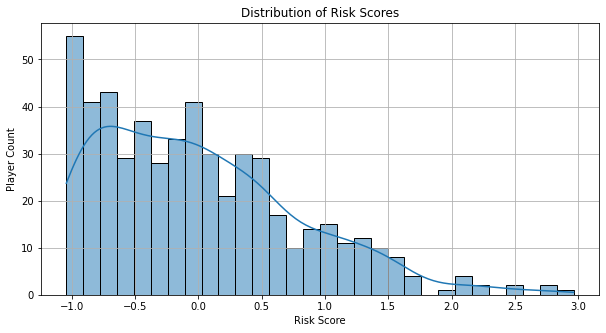

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(df_Features_scaled['risk_score'], bins=30, kde=True)
plt.title("Distribution of Risk Scores")
plt.xlabel("Risk Score")
plt.ylabel("Player Count")
plt.grid(True)
plt.show()

### 

The risk score is right-skewed: most players have low to medium risk, and fewer players have very high risk

The bulk of players fall between -1.0 and 0.75

The tail extends beyond 2.0, with very few players in that range (top risks)

In [37]:
#function to decide risk tier

def classify_risk(score):
    if score >= 1.0:
        return 'High'
    elif score >= -0.25:
        return 'Medium'
    else:
        return 'Low'

In [63]:
df_Features['INJ RISK'] = df_Features_scaled['risk_score'].apply(classify_risk)
df_Features

,PLAYER_NAME,POSITION,TEAM,EXP,FGM,STL,PFD,AST,INJ RISK
0,A.J. Lawson,G,TOR,2.0,80,13,38,31,Low
1,AJ Green,G,MIL,2.0,182,37,50,108,Low
2,AJ Johnson,G,WAS,0.5,82,12,27,76,Low
3,Aaron Gordon,F,DEN,10.0,264,23,137,164,Medium
4,Aaron Holiday,G,HOU,6.0,117,19,49,83,Medium
...,...,...,...,...,...,...,...,...,...
525,Zach LaVine,G,SAC,10.0,625,58,228,310,High
526,Zeke Nnaji,F-C,DEN,4.0,70,25,38,23,Low
527,Ziaire Williams,F,BKN,3.0,214,62,116,84,Medium
528,Zion Williamson,F,NOP,4.0,288,37,170,159,Medium


In [64]:
### run some check with real 24-25 seasons for those key players 

In [65]:
player_names = ['Chris Paul', 'Harrison Barnes', 'Buddy Hield','Mikal Bridges','Julian Champagnie','Bub Carrington',
                'Malik Beasley','Jalen Green','Jarrett Allen','Nickeil Alexander-Walker','Jaden McDaniels']
risk_info = df_Features[df_Features['PLAYER_NAME'].isin(player_names)][['PLAYER_NAME','INJ RISK']]
risk_info

,PLAYER_NAME,INJ RISK
62,Bub Carrington,Medium
63,Buddy Hield,Medium
80,Chris Paul,High
176,Harrison Barnes,High
204,Jaden McDaniels,Medium
215,Jalen Green,High
236,Jarrett Allen,High
283,Julian Champagnie,Medium
352,Malik Beasley,Medium
372,Mikal Bridges,High


In [ ]:
### Features'basci statisc view to help interpret seasonal scores' magnitiude

In [66]:
exp_stats = df_Features['EXP'].agg(['mean', 'max', 'min'])
fgm_stats = df_Features['FGM'].agg(['mean', 'max', 'min'])
stl_stats = df_Features['STL'].agg(['mean', 'max', 'min'])
pfd_stats = df_Features['PFD'].agg(['mean', 'max', 'min'])
ast_stats = df_Features['AST'].agg(['mean', 'max', 'min'])

In [68]:
stats_df = pd.DataFrame({
    'EXP': df_Features['EXP'].agg(['mean', 'max', 'min']),
    'FGM': df_Features['FGM'].agg(['mean', 'max', 'min']),
    'STL': df_Features['STL'].agg(['mean', 'max', 'min']),
    'PFD': df_Features['PFD'].agg(['mean', 'max', 'min']),
    'AST': df_Features['AST'].agg(['mean', 'max', 'min']),
})

print(stats_df)

            EXP         FGM         STL         PFD         AST
mean   4.492453  191.790566   37.667925   85.460377  122.188679
max   21.000000  860.000000  229.000000  507.000000  880.000000
min    0.500000    0.000000    0.000000    0.000000    0.000000
